In [107]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pablo\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [109]:
#Carga y primera vista del dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [110]:
#Ver los nombres de todas las columnas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [111]:
#informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [112]:
# Reemplazar Total charges de object a float
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [113]:
#analisis de las columnas numericas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [114]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [115]:
#elimino los nan 
df = df.dropna(subset=['TotalCharges'])


In [116]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

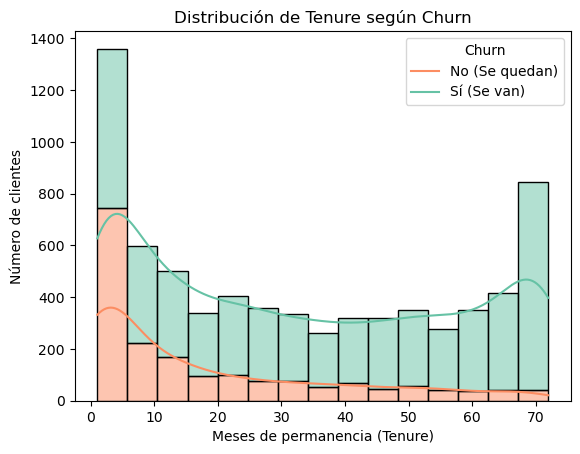

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


In [117]:
# Distribucion del numero de personas en funcion de cuanto tiempo llevan en el banco segun Churn
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, palette='Set2', multiple='stack')
plt.title("Distribución de Tenure según Churn")
plt.xlabel("Meses de permanencia (Tenure)")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No (Se quedan)', 'Sí (Se van)'])
plt.show()
print(df['Churn'].value_counts(normalize=True))

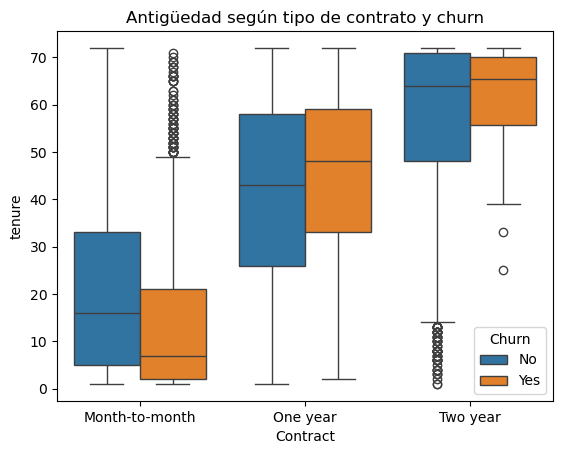

In [118]:
sns.boxplot(data=df, x='Contract', y='tenure', hue='Churn')
plt.title('Antigüedad según tipo de contrato y churn')
plt.show()


Text(0.5, 1.0, 'Distribución de la cantidad mensual gastada por los clientes')

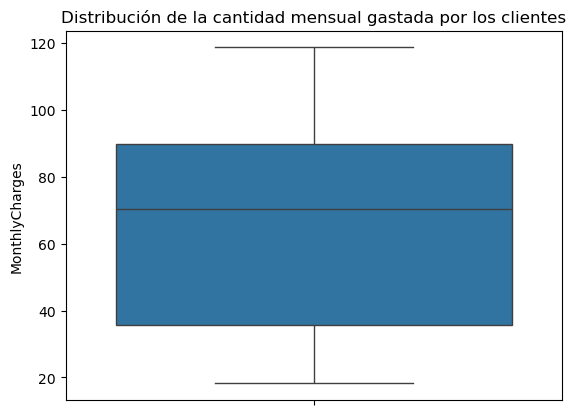

In [119]:
sns.boxplot(data=df, y='MonthlyCharges')
plt.title('Distribución de la cantidad mensual gastada por los clientes')

Text(0.5, 1.0, 'Distribución de la cantidad total gastada por los clientes')

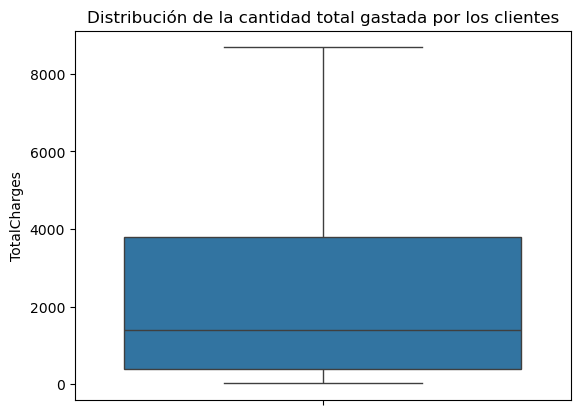

In [120]:
sns.boxplot(data=df, y='TotalCharges')
plt.title('Distribución de la cantidad total gastada por los clientes')

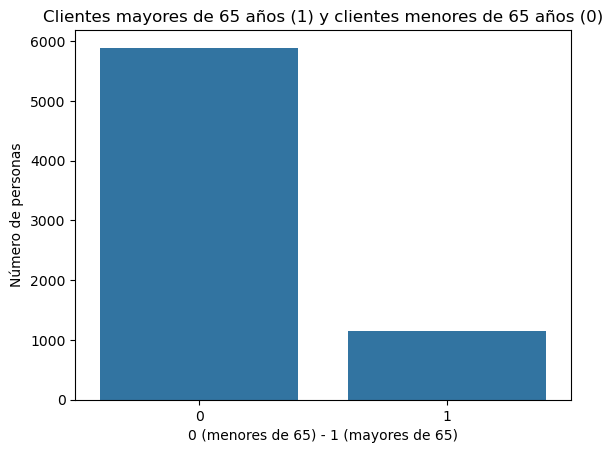

In [121]:
sns.barplot(df['SeniorCitizen'].value_counts())
plt.title('Clientes mayores de 65 años (1) y clientes menores de 65 años (0)')
plt.ylabel('Número de personas')
plt.xlabel('0 (menores de 65) - 1 (mayores de 65)')
plt.show()

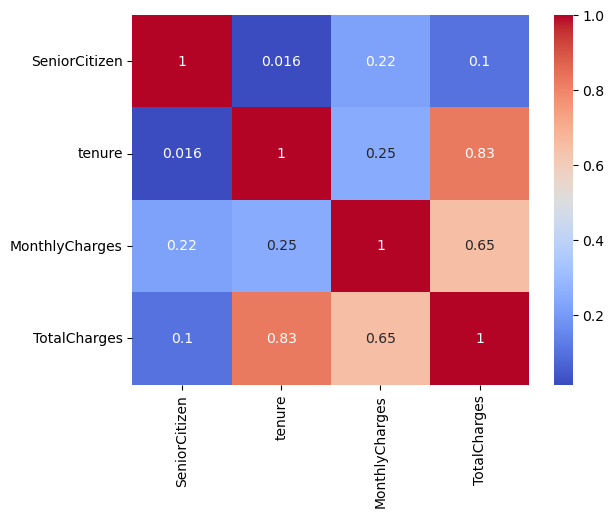

In [122]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [123]:
#Analisis de las columnas categoricas
col_cat = df.select_dtypes(include='object').columns

for col in col_cat:
    print(f"\n{col}:\n", df[col].value_counts())



customerID:
 customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64

gender:
 gender
Male      3549
Female    3483
Name: count, dtype: int64

Partner:
 Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents:
 Dependents
No     4933
Yes    2099
Name: count, dtype: int64

PhoneService:
 PhoneService
Yes    6352
No      680
Name: count, dtype: int64

MultipleLines:
 MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

InternetService:
 InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

OnlineSecurity:
 OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

OnlineBackup:
 OnlineBackup
No                     3087
Yes       

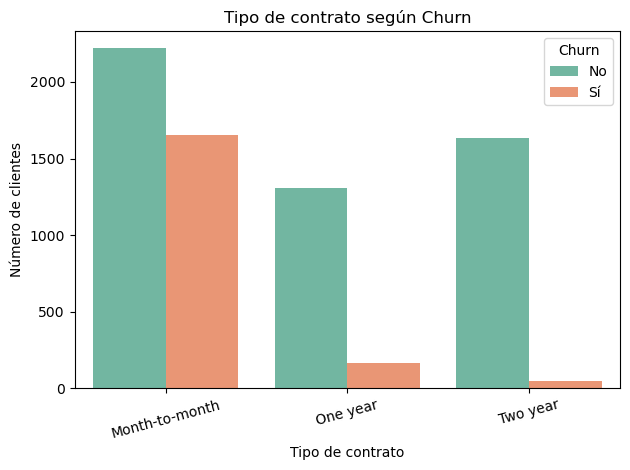

In [124]:
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title("Tipo de contrato según Churn")
plt.xlabel("Tipo de contrato")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


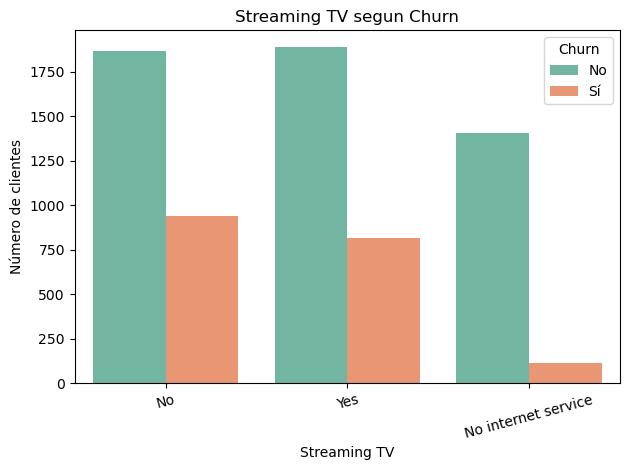

In [125]:
sns.countplot(x='StreamingTV', hue = 'Churn', palette = 'Set2',data=df)
plt.title("Streaming TV segun Churn")
plt.xlabel("Streaming TV")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

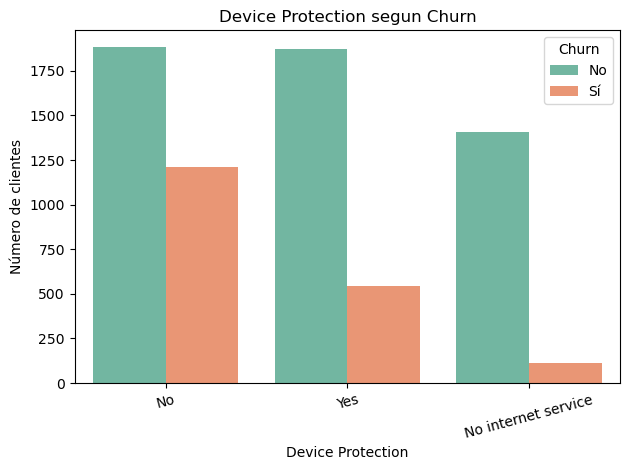

In [126]:
sns.countplot(x='DeviceProtection', hue = 'Churn', palette = 'Set2', data=df)
plt.title("Device Protection segun Churn")
plt.xlabel("Device Protection")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

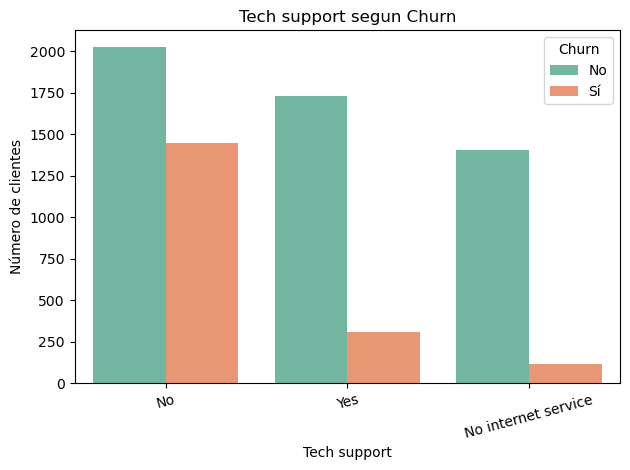

In [127]:
sns.countplot(x='TechSupport', hue = 'Churn', palette = 'Set2', data=df)
plt.title("Tech support segun Churn")
plt.xlabel("Tech support")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

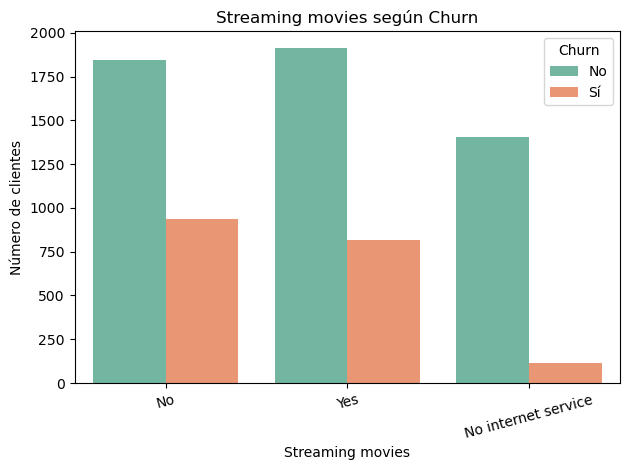

In [128]:
sns.countplot(x='StreamingMovies', hue = 'Churn', palette = 'Set2', data=df)
plt.title("Streaming movies según Churn")
plt.xlabel("Streaming movies")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

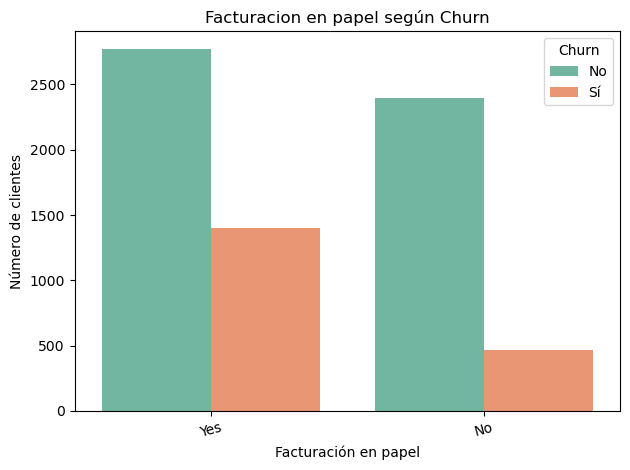

In [129]:
sns.countplot(x='PaperlessBilling', hue = 'Churn', palette = 'Set2', data=df)
plt.title("Facturacion en papel según Churn")
plt.xlabel("Facturación en papel")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

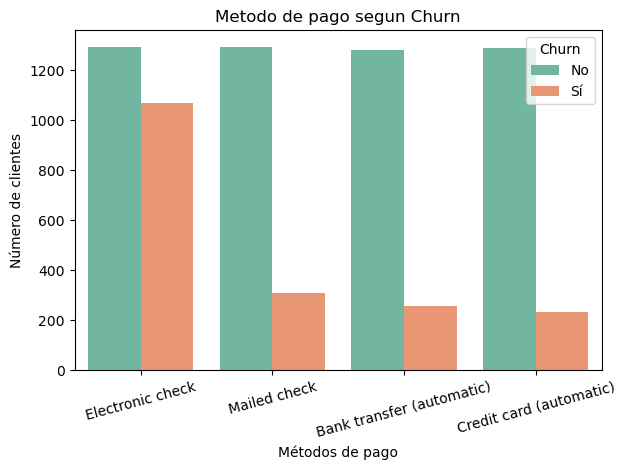

In [130]:
sns.countplot(x='PaymentMethod', hue = 'Churn', palette = 'Set2', data=df)
plt.title("Metodo de pago segun Churn")
plt.xlabel("Métodos de pago")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

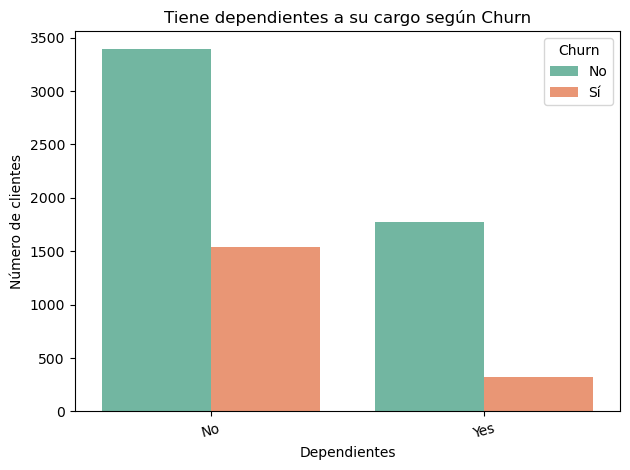

In [131]:
sns.countplot(x='Dependents', hue = 'Churn', palette = 'Set2', data=df)
plt.title("Tiene dependientes a su cargo según Churn")
plt.xlabel("Dependientes")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

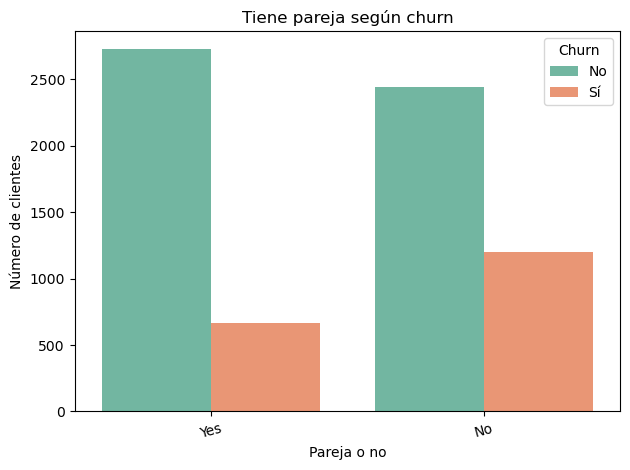

In [132]:
sns.countplot(x='Partner', hue = 'Churn', palette = 'Set2',data=df)
plt.title("Tiene pareja según churn")
plt.xlabel("Pareja o no")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

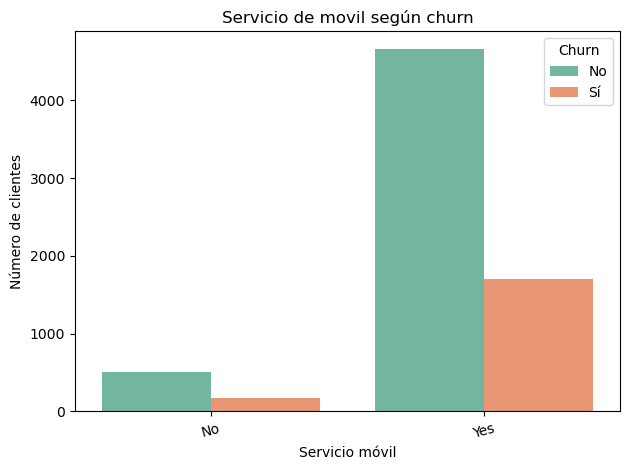

In [133]:
sns.countplot(x='PhoneService', hue = 'Churn', palette = 'Set2', data=df)
plt.title("Servicio de movil según churn")
plt.xlabel("Servicio móvil")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

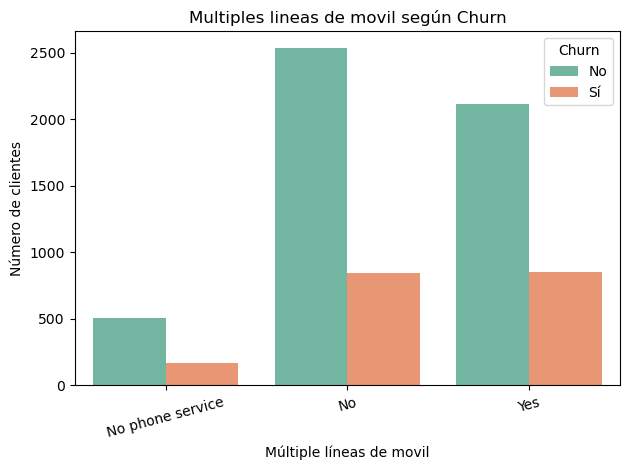

In [134]:
sns.countplot(x='MultipleLines', hue = 'Churn', palette = 'Set2',data=df)
plt.title("Multiples lineas de movil según Churn")
plt.xlabel("Múltiple líneas de movil")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

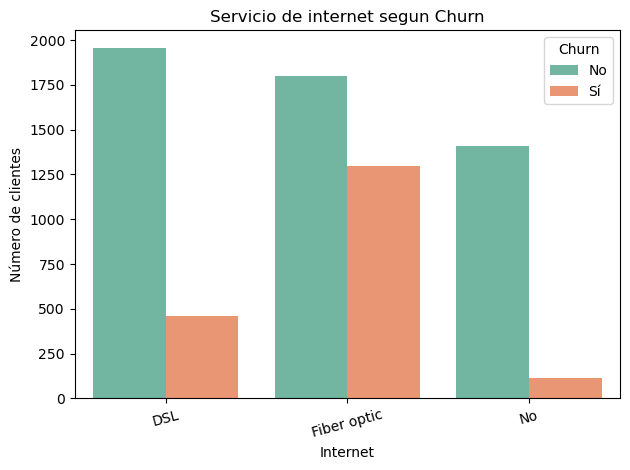

In [135]:
sns.countplot(x='InternetService', hue = 'Churn', palette = 'Set2', data=df)
plt.title("Servicio de internet segun Churn")
plt.xlabel("Internet")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

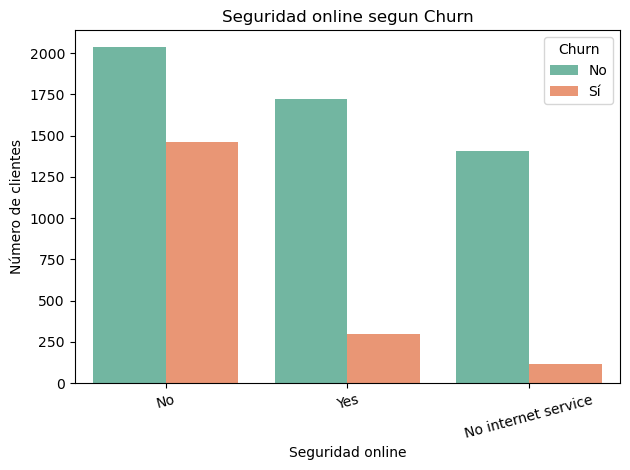

In [136]:
sns.countplot(x='OnlineSecurity', hue = 'Churn', palette = 'Set2', data=df)
plt.title("Seguridad online segun Churn")
plt.xlabel("Seguridad online")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

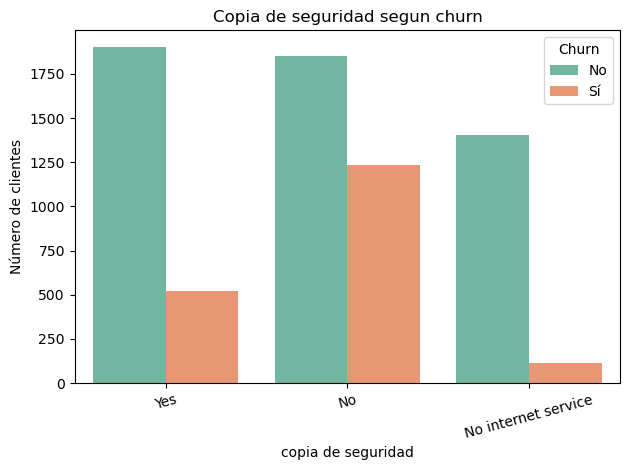

In [137]:
sns.countplot(x='OnlineBackup', hue = 'Churn', palette = 'Set2', data=df)
plt.title("Copia de seguridad segun churn")
plt.xlabel("copia de seguridad")
plt.ylabel("Número de clientes")
plt.legend(title='Churn', labels=['No', 'Sí'])  # 0 = No Churn, 1 = Churn
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_70932\3651902876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


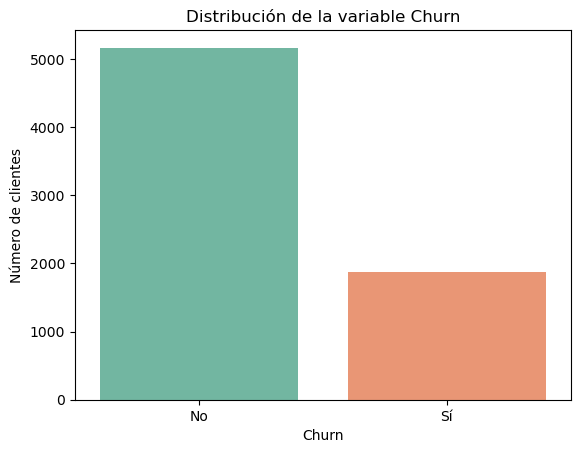

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [138]:
# observar si la variable dependiente esta desbalanceada
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribución de la variable Churn')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])  # 0: No churn, 1: Churn
plt.show()
print(df['Churn'].value_counts())

#### La variable dependiente está desbalanceada

In [140]:
#Conteo de personas que se dan de baja o no en funcion de su tipo de contrato
df.pivot_table(values='customerID', index='Contract', columns='Churn', aggfunc='count')


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [141]:
#media de gastos de las personas que se dan de baja o no en funcion de su tipo de contrato
df.pivot_table(values='MonthlyCharges', index='Contract', columns='Churn', aggfunc='mean')


Churn,No,Yes
Contract,,
Month-to-month,61.462635,73.019396
One year,62.540926,85.050904
Two year,60.112798,86.777083


In [142]:
#diferencias entre hombres y mujeres a la hora de darse de baja
df.groupby('gender')['Churn'].value_counts(normalize=True)


gender  Churn
Female  No       0.730405
        Yes      0.269595
Male    No       0.737954
        Yes      0.262046
Name: proportion, dtype: float64

In [143]:
#diferencias de gastos mensuales entre los que se dan de baja y los que no
df.groupby('Churn')['MonthlyCharges'].mean()


Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [144]:
#diferencias a la hora de darse de baja dependiendo de los tipos de contratos que se tienen
df.groupby('Contract')['Churn'].value_counts(normalize=True)


Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887228
                Yes      0.112772
Two year        No       0.971513
                Yes      0.028487
Name: proportion, dtype: float64

In [145]:
#Codificacion de las variables objeto. LabelEncoder para variable con 2 opciones; get_dummies para variables con +2 opciones
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

col_to_codificar = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in col_to_codificar:
    df[col] = label.fit_transform(df[col])


In [146]:
multi_col = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_col, drop_first=True)


In [147]:
#normalizacion de variables numericas
from sklearn.preprocessing import StandardScaler

numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

df[numericas] = scaler.fit_transform(df[numericas])



In [148]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,...,False,False,False,False,False,False,False,False,True,False


In [149]:
#MODELOS

bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

df = df.drop('customerID', axis = 1)
X = df.drop('Churn', axis=1)   
y = df['Churn']               
            


In [150]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [151]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [153]:
# vamos a arreglar el desbalanceo porque sale perjudicada la clase minoritario, en este caso el si (1).
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



In [154]:
#vamos a intentar mejorar ese desbalanceo con SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.52      0.73      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407

[[780 253]
 [101 273]]


In [155]:
# Importar librerías necesarias para los modelos
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# --- Modelo Random Forest y XGBoost sin SMOTE ---

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=["No Churn", "Churn"]))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))

# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb, target_names=["No Churn", "Churn"]))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))


# --- Modelos con SMOTE ---

# Aplicar SMOTE solo sobre el conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


# Entrenar Random Forest con datos balanceados
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_res, y_train_res)
y_pred_rf_smote = rf_model_smote.predict(X_test)

print("\nRandom Forest con SMOTE - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf_smote, target_names=["No Churn", "Churn"]))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_smote))

# Entrenar XGBoost con datos balanceados
xgb_model_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model_smote.fit(X_train_res, y_train_res)
y_pred_xgb_smote = xgb_model_smote.predict(X_test)

print("\nXGBoost con SMOTE - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb_smote, target_names=["No Churn", "Churn"]))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb_smote))


Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.82      0.91      0.86      1033
       Churn       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Matriz de Confusión:
 [[935  98]
 [201 173]]


C:\Users\pablo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost - Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.83      0.87      0.85      1033
       Churn       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407

Matriz de Confusión:
 [[903 130]
 [188 186]]

Random Forest con SMOTE - Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.85      0.81      0.83      1033
       Churn       0.54      0.62      0.57       374

    accuracy                           0.76      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.77      0.76      0.76      1407

Matriz de Confusión:
 [[833 200]
 [143 231]]


C:\Users\pablo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost con SMOTE - Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.86      0.79      0.82      1033
       Churn       0.52      0.64      0.58       374

    accuracy                           0.75      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.77      0.75      0.76      1407

Matriz de Confusión:
 [[815 218]
 [135 239]]


In [156]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluar_modelo(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Entrenamiento de los tres modelos

# 1. Regresión logística básica
model_1 = LogisticRegression(max_iter=1000)
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

# 2. Regresión logística balanceada
model_2 = LogisticRegression(class_weight='balanced', max_iter=1000)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

# 3. Regresión logística + SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
model_3 = LogisticRegression(max_iter=1000)
model_3.fit(X_train_res, y_train_res)
y_pred_3 = model_3.predict(X_test)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Entrenar RF con SMOTE
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_res, y_train_res)
y_pred_rf_smote = rf_model_smote.predict(X_test)

# Entrenar XGBoost con datos balanceados
xgb_model_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model_smote.fit(X_train_res, y_train_res)
y_pred_xgb_smote = xgb_model_smote.predict(X_test)

# Crear resumen
resultados = {
    "Regresion logistica": evaluar_modelo(y_test, y_pred_1),
    "Regresion logistica Balanceado (class_weight)": evaluar_modelo(y_test, y_pred_2),
    "Regresion logistica con SMOTE": evaluar_modelo(y_test, y_pred_3),
    "Random Forest": evaluar_modelo(y_test, y_pred_rf),
    "XGBoost": evaluar_modelo(y_test, y_pred_xgb),
    "Random Forest SMOTE": evaluar_modelo(y_test, y_pred_xgb_smote),
    "XGBoost con SMOTE": evaluar_modelo(y_test, y_pred_xgb_smote)
    
}

import pandas as pd
pd.DataFrame(resultados).T.round(3)




C:\Users\pablo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\pablo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Accuracy,Precision,Recall,F1-score
Regresion logistica,0.787,0.619,0.513,0.561
Regresion logistica Balanceado (class_weight),0.732,0.497,0.791,0.611
Regresion logistica con SMOTE,0.748,0.519,0.730,0.607
Random Forest,0.787,0.638,0.463,0.536
XGBoost,0.774,0.589,0.497,0.539
Random Forest SMOTE,0.749,0.523,0.639,0.575
XGBoost con SMOTE,0.749,0.523,0.639,0.575


## Conclusiones

En este análisis, se probaron tres enfoques distintos para predecir la tasa de cancelación de clientes (`Churn`):

1. **Regresión logística:** regresión logística sin tratar el desbalanceo.
2. **Regresión logística balanceado:** regresión logística con `class_weight='balanced'`.
3. **Regresión logística con SMOTE:** se aplicó sobremuestreo de la clase minoritaria en el conjunto de entrenamiento.
4. **Random Forest:** random forest sin tratar el desbalanceo.
5. **XGBoost:** xgboost sin tratar el desbalanceo.
6. **Random Forest con SMOTE:** se aplicó sobremuestreo de la clase minoritaria en el conjunto de entrenamiento.
7. **XGBoost con SMOTE:** se aplicó sobremuestreo de la clase minoritaria en el conjunto de entrenamiento.
### Principales observaciones:

- El modelo base tiende a favorecer la clase mayoritaria, penalizando la predicción correcta de clientes que sí cancelan (clase positiva).
- El enfoque con `class_weight='balanced'` mejora  el recall de todos los modelos, pero puede disminuir la precisión.
- Los modelos con SMOTE ofrecen una mejora en **recall** y una disminución de **precisión**.

### Conclusión:

El uso de técnicas para tratar el desbalanceo es crucial en este tipo de problemas. En este caso, **Modelo balanceado parece ser la mejor opción** para obtener un modelo más justo en la predicción de cancelaciones.
